<a href="https://colab.research.google.com/github/janakimeena/DL-Lab/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
#Creates a tokenizer, configured to only take into account the 1,000 most common words
tokenizer = Tokenizer(num_words=1000)
# Builds the  word index
tokenizer.fit_on_texts(samples)
#Turns strings into lists of integer indices
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


## Word Embedding

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems.


Reasonable to learn a new embedding space with every new task
Fortunately, backpropagation makes this easy, and Keras

https://drive.google.com/file/d/1gx-4xLf9XzTkWDQJAp7Jvcrzdv-zTMih/view?usp=sharing

Each word is represented by a real-valued vector, often tens or hundreds of dimensions. This is contrasted to the thousands or millions of dimensions required for sparse word representations, such as a one-hot encoding.

The distributed representation is learned based on the usage of words. This allows words that are used in similar ways to result in having similar representations, naturally capturing their meaning. 

In [0]:
# The Embedding layer takes at least two arguments: the number of possible tokens(here, 1,000: 1 + maximum word index)
# and the dimensionality of the embeddings (here, 64).

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
# Number of words to consider as features
# Cuts off texts after this many words (among the max_features most common words)
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32,return_sequences = True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6204 - acc: 0.6218 - val_loss: 0.4003 - val_acc: 0.8238
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.3842 - acc: 0.8375 - val_loss: 0.3642 - val_acc: 0.8554
Epoch 3/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.2776 - acc: 0.8907 - val_loss: 0.3752 - val_acc: 0.8348
Epoch 4/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.1673 - acc: 0.9378 - val_loss: 0.6127 - val_acc: 0.7904
Epoch 5/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1041 - acc: 0.9635 - val_loss: 0.4999 - val_acc: 0.8150
Epoch 6/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.0513 - acc: 0.9836 - val_loss: 0.7526 - val_acc: 0.7554
Epoch 7/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.0308 - acc: 0.9910 - val_loss: 0.8257 - val_acc:

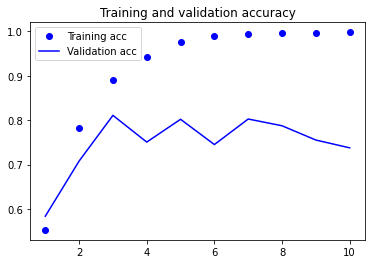

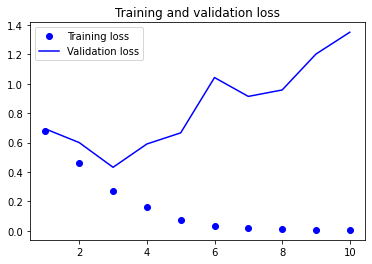

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()